# Figure Drafts for Paper/Poster

In [29]:
import matplotlib.font_manager as fm
import matplotlib as plt

available_fonts = sorted({f.name for f in fm.fontManager.ttflist})
plt.rcParams['font.family'] = 'Garamond'
plt.rcParams['font.size'] = 11 


## Llama.cpp

### Distribution of error types by model

In [ ]:
import pandas as pd

# File paths
file_paths = [
    r"C:\Users\aisha\OneDrive\Desktop\summer_2026_project_review\Anote_LLMs_finetuning_08012025\fine-tuned models\Llama-3.2-1B-Instruct-Q6_K_L_guff_results.csv",
    r"C:\Users\aisha\OneDrive\Desktop\summer_2026_project_review\Anote_LLMs_finetuning_08012025\fine-tuned models\tinyllama-1.1b-1t-openorca.Q5_K_M_guff_results.csv",
    r"C:\Users\aisha\OneDrive\Desktop\summer_2026_project_review\Anote_LLMs_finetuning_08012025\fine-tuned models\bling-1b-0.1.Q4_K_M_guff_results.csv",
    r"C:\Users\aisha\OneDrive\Desktop\summer_2026_project_review\Anote_LLMs_finetuning_08012025\fine-tuned models\phi-2.Q4_K_M_guff_results.csv",
    r"C:\Users\aisha\OneDrive\Desktop\summer_2026_project_review\Anote_LLMs_finetuning_08012025\fine-tuned models\stablelm-2-1_6b-chat.Q4_K_M_guff_results.csv"
]

# Load and concatenate
df_list = [pd.read_csv(path) for path in file_paths]
guff_model_results_df = pd.concat(df_list, ignore_index=True)
guff_model_results_df['run_type'] = 'zero-shot-context'


guff_model_results_df


,id,type,prediction,actual,numeric_correct,semantic_score,semantic_correct,model,run_type
0,financebench_id_03029,metrics-generated,4870,$1577.00,False,NaN,NaN,LLaMA 3.2–1B Instruct,zero-shot-context
1,financebench_id_04672,metrics-generated,24873,$8.70,False,NaN,NaN,LLaMA 3.2–1B Instruct,zero-shot-context
2,financebench_id_00499,domain-relevant,"Yes, 3M appears to be a capital-intensive busi...","No, the company is managing its CAPEX and Fixe...",NaN,0.454895,False,LLaMA 3.2–1B Instruct,zero-shot-context
3,financebench_id_01226,domain-relevant,The increase in operating margin from 20.8% in...,Operating Margin for 3M in FY2022 has decrease...,NaN,0.782748,False,LLaMA 3.2–1B Instruct,zero-shot-context
4,financebench_id_01865,novel-generated,The segment that has dragged down 3M's overall...,The consumer segment shrunk by 0.9% organically.,NaN,0.305313,False,LLaMA 3.2–1B Instruct,zero-shot-context
...,...,...,...,...,...,...,...,...,...
745,financebench_id_00215,domain-relevant,"Yes, Verizon is capital intensive based on FY ...",Yes. Verizon's capital intensity ratio was app...,NaN,0.814914,True,StableLM 1.6B,zero-shot-context
746,financebench_id_00566,domain-relevant,"Yes, between the fiscal periods of December 20...",No. Verizon's debt decreased by $229 million.,NaN,0.692147,False,StableLM 1.6B,zero-shot-context
747,financebench_id_06247,metrics-generated,2,42.69,False,NaN,NaN,StableLM 1.6B,zero-shot-context
748,financebench_id_04784,metrics-generated,-44.61,0.2%,False,NaN,NaN,StableLM 1.6B,zero-shot-context


In [ ]:
file_paths_context = [
    r"C:\Users\aisha\OneDrive\Desktop\summer_2026_project_review\Anote_LLMs_finetuning_08012025\fine-tuned models\Llama-3.2-1B-Instruct-Q6_K_L_guff_RAG_results.csv",
    r"C:\Users\aisha\OneDrive\Desktop\summer_2026_project_review\Anote_LLMs_finetuning_08012025\fine-tuned models\tinyllama-1.1b-1t-openorca.Q5_K_M_guff_RAG_results.csv",
    r"C:\Users\aisha\OneDrive\Desktop\summer_2026_project_review\Anote_LLMs_finetuning_08012025\fine-tuned models\bling-1b-0.1.Q4_K_M_guff_RAG_results.csv",
    r"C:\Users\aisha\OneDrive\Desktop\summer_2026_project_review\Anote_LLMs_finetuning_08012025\fine-tuned models\phi-2.Q4_K_M_guff_RAG_results.csv",
    r"C:\Users\aisha\OneDrive\Desktop\summer_2026_project_review\Anote_LLMs_finetuning_08012025\fine-tuned models\stablelm-2-1_6b-chat.Q4_K_M_guff_RAG_results.csv"
]

# Load and concatenate context results
df_context_list = [pd.read_csv(path) for path in file_paths_context]
zero_shot_context_df = pd.concat(df_context_list, ignore_index=True)
zero_shot_context_df['run_type'] = 'zero-shot-rag'

# Concatenate the fine-tuned and context results DataFrames
guff_model_results_df = pd.concat([guff_model_results_df, zero_shot_context_df], ignore_index=True)

print(guff_model_results_df['run_type'].value_counts())

run_type
zero-shot-context    750
zero-shot-rag        750
Name: count, dtype: int64


In [ ]:
# Load the new dataset
new_file_path = r"C:\Users\aisha\OneDrive\Desktop\summer_2026_project_review\Anote_LLMs_finetuning_08012025\fine-tuned models\all_base_model_guff_results.csv"
rag_df = pd.read_csv(new_file_path)

# Update run_type column to 'zero-shot-rag'
rag_df['run_type'] = 'zero-shot'

# Concatenate with the existing fine-tuned DataFrame
guff_model_results_df = pd.concat([guff_model_results_df, rag_df], ignore_index=True)

print(guff_model_results_df['run_type'].value_counts())


run_type
zero-shot-context    750
zero-shot-rag        750
zero-shot            750
Name: count, dtype: int64


In [33]:
guff_model_results_df

,id,type,prediction,actual,numeric_correct,semantic_score,semantic_correct,model,run_type
0,financebench_id_03029,metrics-generated,4870,$1577.00,False,NaN,NaN,LLaMA 3.2–1B Instruct,zero-shot-context
1,financebench_id_04672,metrics-generated,24873,$8.70,False,NaN,NaN,LLaMA 3.2–1B Instruct,zero-shot-context
2,financebench_id_00499,domain-relevant,"Yes, 3M appears to be a capital-intensive busi...","No, the company is managing its CAPEX and Fixe...",NaN,0.454895,False,LLaMA 3.2–1B Instruct,zero-shot-context
3,financebench_id_01226,domain-relevant,The increase in operating margin from 20.8% in...,Operating Margin for 3M in FY2022 has decrease...,NaN,0.782748,False,LLaMA 3.2–1B Instruct,zero-shot-context
4,financebench_id_01865,novel-generated,The segment that has dragged down 3M's overall...,The consumer segment shrunk by 0.9% organically.,NaN,0.305313,False,LLaMA 3.2–1B Instruct,zero-shot-context
...,...,...,...,...,...,...,...,...,...
2245,financebench_id_00215,domain-relevant,"No, Verizon is not considered a capital-intens...",Yes. Verizon's capital intensity ratio was app...,NaN,0.831748,True,StableLM 1.6B,zero-shot
2246,financebench_id_00566,domain-relevant,To determine if Verizon has increased its debt...,No. Verizon's debt decreased by $229 million.,NaN,0.505845,False,StableLM 1.6B,zero-shot
2247,financebench_id_06247,metrics-generated,101.91,42.69,False,NaN,NaN,StableLM 1.6B,zero-shot
2248,financebench_id_04784,metrics-generated,18.3,0.2%,False,NaN,NaN,StableLM 1.6B,zero-shot


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Define hallucination detection function
def detect_hallucination(row):
    pred = row['prediction']
    numeric = row['numeric_correct']
    semantic = row['semantic_correct']
    
    # Prediction must be non-empty (avoid counting empty answers)
    if not isinstance(pred, str) or pred.strip() == '':
        return False
    
    # Hallucination if prediction is incorrect (both numeric and semantic False or NaN)
    if ((numeric is False or pd.isna(numeric)) and
        (semantic is False or pd.isna(semantic))):
        return True
    
    return False

# Define updated classification function with hallucination instead of no_answer
def classify(row):
    numeric = row['numeric_correct']
    semantic = row['semantic_correct']
    
    if detect_hallucination(row):
        return 'hallucination'
    elif (numeric is True) or (semantic is True):
        return 'correct'
    else:
        return 'incorrect'

# Apply classification
guff_model_results_df['answer_type'] = guff_model_results_df.apply(classify, axis=1)

# Count total hallucinations
hallucination_mask = guff_model_results_df['answer_type'] == 'hallucination'
print(f"Total hallucinations: {hallucination_mask.sum()}")

# Count hallucinations per model
hallucination_per_model = guff_model_results_df[hallucination_mask].groupby('model').size()
print("Hallucination counts per model:")
print(hallucination_per_model)

Total hallucinations: 1403
Hallucination counts per model:
model
BLING-1B                   210
LLaMA 3.2–1B Instruct      341
Phi-2                      288
StableLM 1.6B              370
TinyLLaMA 1.1B OpenOrca    194
dtype: int64


In [35]:
# # Group by model and answer type
# grouped = hf_model_results_df.groupby(['model', 'answer_type']).size().unstack(fill_value=0)

# # Ensure all columns are present
# for col in ['correct', 'incorrect', 'hallucination']:
#     if col not in grouped.columns:
#         grouped[col] = 0

# # Calculate percentages per model (row-wise normalization)
# grouped_percent = grouped.div(grouped.sum(axis=1), axis=0)

# grouped_sorted = grouped_percent.sort_values(by='correct', ascending=True)


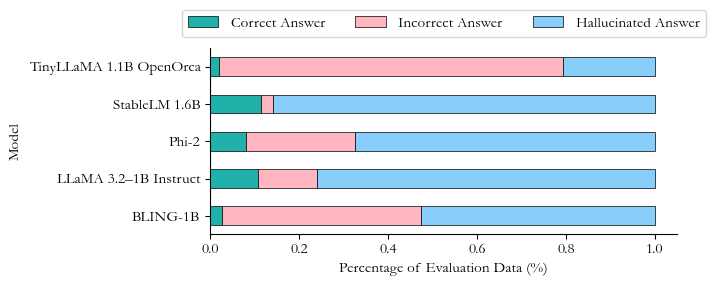

In [36]:
# Group by model and answer type
zero_shot_df = guff_model_results_df[guff_model_results_df['run_type'] == 'zero-shot'].copy()
grouped = zero_shot_df.groupby(['model', 'answer_type']).size().unstack(fill_value=0)

# Ensure all columns are present
for col in ['correct', 'incorrect', 'hallucination']:
    if col not in grouped.columns:
        grouped[col] = 0

# Calculate percentages per model (row-wise normalization)
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0)

# grouped_sorted = grouped_percent.sort_values(by='correct', ascending=True)

legend_labels = ['Correct Answer', 'Incorrect Answer', 'Hallucinated Answer']
new_model_labels = {
    'BLING-1B': 'BLING 1B',
    'LLaMA 3.2–1B Instruct': 'LLaMA 3.2–1B Instruct',
    'Phi-2': 'Phi 2.0',
    'StableLM 1.6B': 'StableLM 1.6B',
    'TinyLLaMA 1.1B OpenOrca': 'TinyLLaMA 1.1B OpenOrca'
}


# custom_colors = ['#4CAF50', '#F44336', '#FF9800']
custom_colors = ['#20b2aa', '#ffb6c1', '#87cefa']  # LightSeaGreen, LightPink, LightSkyBlue

ax = grouped_percent[['correct', 'incorrect', 'hallucination']].plot(
    kind='barh',
    stacked=True,
    figsize=(7, 3),
    color=custom_colors,
    edgecolor='black',
    linewidth=0.5  
)

# ax.set_yticklabels([new_model_labels.get(label, label) for label in grouped_sorted.index])
plt.xlabel("Percentage of Evaluation Data (%)")
plt.ylabel("Model")
plt.legend(legend_labels, loc='lower center', bbox_to_anchor=(0.5, 1.02), ncol=3)

for spine in ax.spines.values():
    spine.set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.tight_layout()
plt.show()


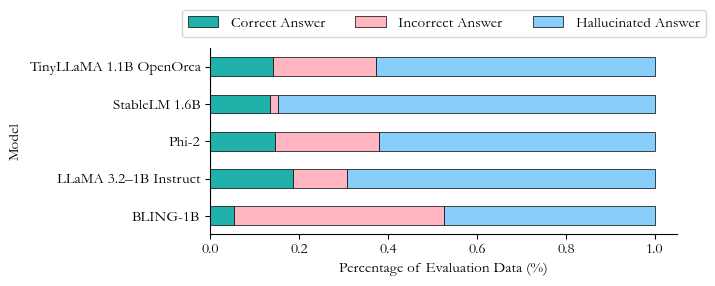

In [37]:
# Group by model and answer type
zero_shot_context_df = guff_model_results_df[guff_model_results_df['run_type'] == 'zero-shot-context'].copy()
grouped = zero_shot_context_df.groupby(['model', 'answer_type']).size().unstack(fill_value=0)

# Ensure all columns are present
for col in ['correct', 'incorrect', 'hallucination']:
    if col not in grouped.columns:
        grouped[col] = 0

# Calculate percentages per model (row-wise normalization)
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0)

# grouped_sorted = grouped_percent.sort_values(by='correct', ascending=True)

legend_labels = ['Correct Answer', 'Incorrect Answer', 'Hallucinated Answer']
new_model_labels = {
    'BLING-1B': 'BLING 1B',
    'LLaMA 3.2–1B Instruct': 'LLaMA 3.2–1B Instruct',
    'Phi-2': 'Phi 2.0',
    'StableLM 1.6B': 'StableLM 1.6B',
    'TinyLLaMA 1.1B OpenOrca': 'TinyLLaMA 1.1B OpenOrca'
}

# custom_colors = ['#4CAF50', '#F44336', '#FF9800']
custom_colors = ['#20b2aa', '#ffb6c1', '#87cefa']  # LightSeaGreen, LightPink, LightSkyBlue

ax = grouped_percent[['correct', 'incorrect', 'hallucination']].plot(
    kind='barh',
    stacked=True,
    figsize=(7, 3),
    color=custom_colors,
    edgecolor='black',
    linewidth=0.5  
)

# ax.set_yticklabels([new_model_labels.get(label, label) for label in grouped_sorted.index])
plt.xlabel("Percentage of Evaluation Data (%)")
plt.ylabel("Model")
plt.legend(legend_labels, loc='lower center', bbox_to_anchor=(0.5, 1.02), ncol=3)

for spine in ax.spines.values():
    spine.set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.tight_layout()
plt.show()


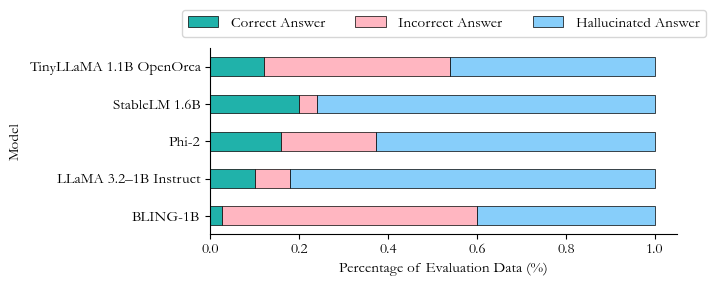

In [38]:
import matplotlib.pyplot as plt

zero_shot_rag_df = guff_model_results_df[guff_model_results_df['run_type'] == 'zero-shot-rag'].copy()
grouped = zero_shot_rag_df.groupby(['model', 'answer_type']).size().unstack(fill_value=0)

for col in ['correct', 'incorrect', 'hallucination']:
    if col not in grouped.columns:
        grouped[col] = 0

# Calculate percentages per model (row-wise normalization)
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0)
# grouped_sorted = grouped_percent.sort_values(by='correct', ascending=True)

legend_labels = ['Correct Answer', 'Incorrect Answer', 'Hallucinated Answer']
new_model_labels = {
    'BLING-1B': 'BLING 1B',
    'LLaMA 3.2–1B Instruct': 'LLaMA 3.2–1B Instruct',
    'Phi-2': 'Phi 2.0',
    'StableLM 1.6B': 'StableLM 1.6B',
    'TinyLLaMA 1.1B OpenOrca': 'TinyLLaMA 1.1B OpenOrca'
}
# custom_colors = ['mediumseagreen', 'orangered', '#FF9800']
# custom_colors = ['#6a5acd', '#ff6347', '#ffd700']  # SlateBlue, Tomato, Gold
custom_colors = ['#20b2aa', '#ffb6c1', '#87cefa']  # LightSeaGreen, LightPink, LightSkyBlue
# custom_colors = ['#ff1493', '#00bfff', '#32cd32']  # DeepPink, DeepSkyBlue, LimeGreen
# custom_colors = ['#b0e0e6', '#f5deb3', '#dda0dd']  # PowderBlue, Wheat, Plum





# Plot
ax = grouped_percent[['correct', 'incorrect', 'hallucination']].plot(
    kind='barh',
    stacked=True,
    figsize=(7, 3),
    color=custom_colors,
    edgecolor='black',
    linewidth=0.5  
)

# # Custom y-axis labels
# ax.set_yticklabels([new_model_labels.get(label, label) for label in grouped_sorted.index])

# Axis and legend
plt.xlabel("Percentage of Evaluation Data (%)")
plt.ylabel("Model")
plt.legend(legend_labels, loc='lower center', bbox_to_anchor=(0.5, 1.02), ncol=3)

# Show only left and bottom borders
for spine in ax.spines.values():
    spine.set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.tight_layout()
plt.show()


### Comparison by question type (numeric vs semantic)

In [39]:
guff_model_results_df

,id,type,prediction,actual,numeric_correct,semantic_score,semantic_correct,model,run_type,answer_type
0,financebench_id_03029,metrics-generated,4870,$1577.00,False,NaN,NaN,LLaMA 3.2–1B Instruct,zero-shot-context,hallucination
1,financebench_id_04672,metrics-generated,24873,$8.70,False,NaN,NaN,LLaMA 3.2–1B Instruct,zero-shot-context,hallucination
2,financebench_id_00499,domain-relevant,"Yes, 3M appears to be a capital-intensive busi...","No, the company is managing its CAPEX and Fixe...",NaN,0.454895,False,LLaMA 3.2–1B Instruct,zero-shot-context,hallucination
3,financebench_id_01226,domain-relevant,The increase in operating margin from 20.8% in...,Operating Margin for 3M in FY2022 has decrease...,NaN,0.782748,False,LLaMA 3.2–1B Instruct,zero-shot-context,hallucination
4,financebench_id_01865,novel-generated,The segment that has dragged down 3M's overall...,The consumer segment shrunk by 0.9% organically.,NaN,0.305313,False,LLaMA 3.2–1B Instruct,zero-shot-context,hallucination
...,...,...,...,...,...,...,...,...,...,...
2245,financebench_id_00215,domain-relevant,"No, Verizon is not considered a capital-intens...",Yes. Verizon's capital intensity ratio was app...,NaN,0.831748,True,StableLM 1.6B,zero-shot,correct
2246,financebench_id_00566,domain-relevant,To determine if Verizon has increased its debt...,No. Verizon's debt decreased by $229 million.,NaN,0.505845,False,StableLM 1.6B,zero-shot,hallucination
2247,financebench_id_06247,metrics-generated,101.91,42.69,False,NaN,NaN,StableLM 1.6B,zero-shot,hallucination
2248,financebench_id_04784,metrics-generated,18.3,0.2%,False,NaN,NaN,StableLM 1.6B,zero-shot,hallucination


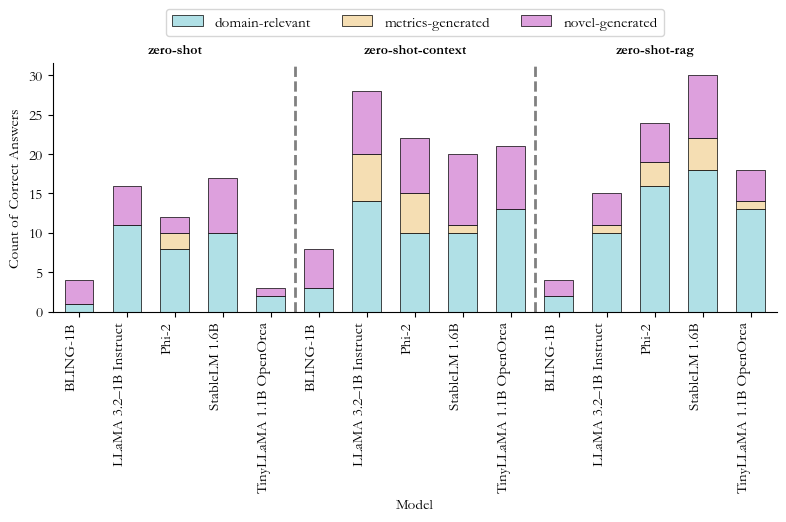

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

# Ensure correct column types and avoid FutureWarning
guff_model_results_df['numeric_correct'] = (
    guff_model_results_df['numeric_correct'].astype('boolean').fillna(False)
)
guff_model_results_df['semantic_correct'] = (
    guff_model_results_df['semantic_correct'].astype('boolean').fillna(False)
)

# Combine numeric and semantic correctness
guff_model_results_df['is_correct'] = guff_model_results_df['numeric_correct'] | guff_model_results_df['semantic_correct']

# Filter only correct predictions
df_correct = guff_model_results_df[guff_model_results_df['is_correct'] == True]

# Group by run_type, model, and answer type (domain-relevant, etc.)
grouped = df_correct.groupby(['run_type', 'model', 'type']).size().reset_index(name='count')

# Pivot so we can plot answer type as stacked bars
pivoted = grouped.pivot_table(index=['run_type', 'model'], columns='type', values='count', fill_value=0)

# Reset index so we can reorder run_type properly
pivoted_reset = pivoted.reset_index()

# Define and apply the desired order for run_type
desired_run_type_order = ['zero-shot', 'zero-shot-context', 'zero-shot-rag']
run_type_cat = CategoricalDtype(categories=desired_run_type_order, ordered=True)
pivoted_reset['run_type'] = pivoted_reset['run_type'].astype(run_type_cat)

# Sort by run_type (categorical order) and model
pivoted_reset = pivoted_reset.sort_values(['run_type', 'model'])

# Create combined labels for x-axis (convert run_type to str before concatenation)
pivoted_reset['label'] = pivoted_reset['run_type'].astype(str) + " - " + pivoted_reset['model'].astype(str)

# Set label as index again
pivoted = pivoted_reset.set_index('label')
pivoted = pivoted.drop(columns=['run_type', 'model'])  # keep only counts

fig, ax = plt.subplots(figsize=(8, 5.5))
custom_colors = ['#b0e0e6', '#f5deb3', '#dda0dd']  # PowderBlue, Wheat, Plum
# custom_colors = ['#a8dadc', '#ffe156', '#ff677d']  # PowderBlue, MellowYellow, LightCoral
pivoted.plot(kind='bar', stacked=True, ax=ax, edgecolor='black', linewidth=0.5, width=0.6, color=custom_colors)

# Add vertical dashed lines between run_type groups
run_types = [lbl.split(" - ")[0] for lbl in pivoted.index]
unique_run_types = []
run_type_boundaries = []

last_run_type = run_types[0]
for i, rt in enumerate(run_types):
    if rt != last_run_type:
        run_type_boundaries.append(i - 0.5)
        unique_run_types.append(last_run_type)
        last_run_type = rt
unique_run_types.append(last_run_type)  # Add the last one

# Add dashed lines
for boundary in run_type_boundaries:
    ax.axvline(x=boundary, color='gray', linestyle='--', linewidth=2)

# Add run_type labels above the plot
for i, rt in enumerate(unique_run_types):
    if i == 0:
        start = 0
    else:
        start = run_type_boundaries[i - 1] + 0.5
    end = run_type_boundaries[i] + 0.5 if i < len(run_type_boundaries) else len(run_types)
    center = (start + end - 1) / 2
    ax.text(center, ax.get_ylim()[1] + 1, rt, ha='center', va='bottom', fontsize=10, fontweight='bold')

# Show only left and bottom borders
for spine in ax.spines.values():
    spine.set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.xlabel("Model")  # Updated to only show "Model" on x-axis
plt.ylabel("Count of Correct Answers")

# Update x-axis tick labels to show only the part after "-"
ax.set_xticklabels([label.split(" - ")[1] for label in pivoted.index], rotation=90, ha='right')

plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.08), ncol=3)
plt.tight_layout()
plt.show()

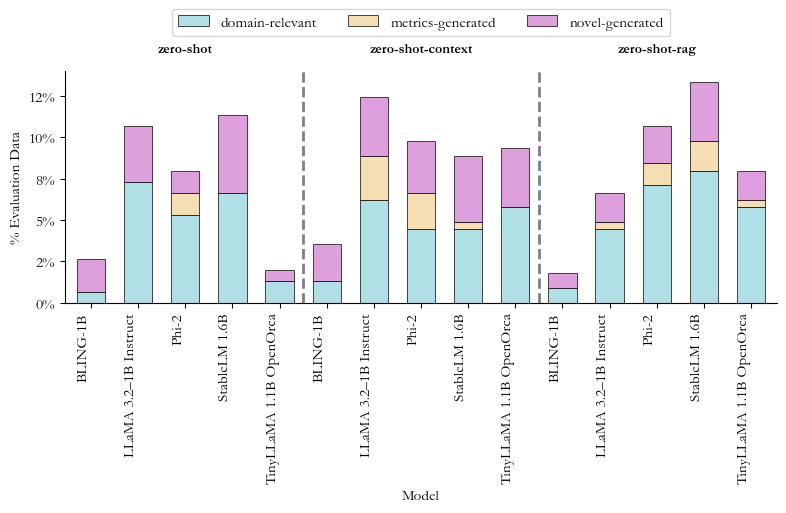

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

# Ensure correct column types and avoid FutureWarning
guff_model_results_df['numeric_correct'] = (
    guff_model_results_df['numeric_correct'].astype('boolean').fillna(False)
)
guff_model_results_df['semantic_correct'] = (
    guff_model_results_df['semantic_correct'].astype('boolean').fillna(False)
)

# Combine numeric and semantic correctness
guff_model_results_df['is_correct'] = guff_model_results_df['numeric_correct'] | guff_model_results_df['semantic_correct']

# Filter only correct predictions
df_correct = guff_model_results_df[guff_model_results_df['is_correct'] == True]

# Group by run_type, model, and answer type (domain-relevant, etc.)
grouped = df_correct.groupby(['run_type', 'model', 'type']).size().reset_index(name='count')

# Pivot so we can plot answer type as stacked bars
pivoted = grouped.pivot_table(index=['run_type', 'model'], columns='type', values='count', fill_value=0)

# Reset index so we can reorder run_type properly
pivoted_reset = pivoted.reset_index()

# Define and apply the desired order for run_type
desired_run_type_order = ['zero-shot', 'zero-shot-context', 'zero-shot-rag']
run_type_cat = CategoricalDtype(categories=desired_run_type_order, ordered=True)
pivoted_reset['run_type'] = pivoted_reset['run_type'].astype(run_type_cat)

# Sort by run_type (categorical order) and model
pivoted_reset = pivoted_reset.sort_values(['run_type', 'model'])

# Create combined labels for x-axis (convert run_type to str before concatenation)
pivoted_reset['label'] = pivoted_reset['run_type'].astype(str) + " - " + pivoted_reset['model'].astype(str)

# Set label as index again
pivoted = pivoted_reset.set_index('label')
pivoted = pivoted.drop(columns=['run_type', 'model'])  # keep only counts

# Define sample sizes for zero-shot and fine-tuned models
sample_sizes = {
    'zero-shot': 150,
    'zero-shot-rag': 150,
    'zero-shot-context': 150
}

# Function to calculate percentage for each row based on the sample size
def calculate_percentage(row, run_type):
    sample_size = sample_sizes.get(run_type, 1)  # Default to 1 to avoid division by zero
    return (row / sample_size) * 100

# Apply percentage calculation for each row based on the run_type
for run_type in sample_sizes.keys():
    # Filter the rows corresponding to each run_type
    mask = pivoted.index.str.startswith(run_type)
    pivoted.loc[mask] = pivoted.loc[mask].apply(lambda row: calculate_percentage(row, run_type), axis=1)

fig, ax = plt.subplots(figsize=(8, 5.5))
# custom_colors = ['#B0E0E6', '#98FB98', '#E6E6FA']  # PowderBlue, PaleGreen, Lavender
custom_colors = ['#b0e0e6', '#f5deb3', '#dda0dd']  # PowderBlue, Wheat, Plum
pivoted.plot(kind='bar', stacked=True, ax=ax, edgecolor='black', linewidth=0.5, width=0.6, color=custom_colors)

# Add vertical dashed lines between run_type groups
run_types = [lbl.split(" - ")[0] for lbl in pivoted.index]
unique_run_types = []
run_type_boundaries = []

last_run_type = run_types[0]
for i, rt in enumerate(run_types):
    if rt != last_run_type:
        run_type_boundaries.append(i - 0.5)
        unique_run_types.append(last_run_type)
        last_run_type = rt
unique_run_types.append(last_run_type)  # Add the last one

# Add dashed lines
for boundary in run_type_boundaries:
    ax.axvline(x=boundary, color='gray', linestyle='--', linewidth=2)

# Add run_type labels above the plot
for i, rt in enumerate(unique_run_types):
    if i == 0:
        start = 0
    else:
        start = run_type_boundaries[i - 1] + 0.5
    end = run_type_boundaries[i] + 0.5 if i < len(run_type_boundaries) else len(run_types)
    center = (start + end - 1) / 2
    ax.text(center, ax.get_ylim()[1] + 1, rt, ha='center', va='bottom', fontsize=10, fontweight='bold')

# Show only left and bottom borders
for spine in ax.spines.values():
    spine.set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.xlabel("Model")  # Updated to only show "Model" on x-axis
plt.ylabel("% Evaluation Data")

# Update x-axis tick labels to show only the part after "-"
ax.set_xticklabels([label.split(" - ")[1] for label in pivoted.index], rotation=90, ha='right')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.12), ncol=3)
plt.tight_layout()
plt.show()


In [42]:
import pandas as pd

# Define the sample sizes for each run_type
sample_sizes = {
    'zero-shot': 150,
    'zero-shot-rag': 150,
    'zero-shot-context': 150
}

# First, create a new column that combines correctness (numeric or semantic)
guff_model_results_df['is_correct'] = guff_model_results_df['numeric_correct'] | guff_model_results_df['semantic_correct']

# Filter out rows where the prediction is incorrect, as we are interested in correct answers only
df_correct = guff_model_results_df[guff_model_results_df['is_correct'] == True]

# Group by `run_type`, `model`, and `type` (question type)
grouped = df_correct.groupby(['run_type', 'model', 'type']).size().reset_index(name='correct_count')

# Calculate the total count for each `run_type` and `model` combination, including all question types
total_counts = guff_model_results_df.groupby(['run_type', 'model', 'type']).size().reset_index(name='total_count')

# Merge the two DataFrames: one with correct counts, the other with total counts
merged = pd.merge(grouped, total_counts, on=['run_type', 'model', 'type'])

# Function to calculate percentage based on the sample size for each run_type
def calculate_percentage(row, sample_sizes):
    sample_size = sample_sizes.get(row['run_type'], 1)  # Default to 1 to avoid division by zero
    return (row['correct_count'] / sample_size) * 100

# Apply the percentage calculation
merged['accuracy_percentage'] = merged.apply(calculate_percentage, axis=1, sample_sizes=sample_sizes)

# Pivot the table to have `run_type` and `model` as rows, and `type` as columns
pivoted = merged.pivot_table(index=['run_type', 'model'], columns='type', values='accuracy_percentage', fill_value=0)

# Reset index to make `run_type` and `model` columns again
pivoted_reset = pivoted.reset_index()

# Reorder the `run_type` as per the desired order
desired_run_type_order = ['zero-shot', 'zero-shot-context', 'zero-shot-rag', 'fine-tuned', 'fine-tuned-rag']
run_type_cat = pd.CategoricalDtype(categories=desired_run_type_order, ordered=True)
pivoted_reset['run_type'] = pivoted_reset['run_type'].astype(run_type_cat)

# Sort by `run_type` and `model`
pivoted_reset = pivoted_reset.sort_values(['run_type', 'model'])

# Create a label column for combining `run_type` and `model`
pivoted_reset['label'] = pivoted_reset['run_type'].astype(str) + " - " + pivoted_reset['model'].astype(str)

# Set label as the index and drop the `run_type` and `model` columns
final_df = pivoted_reset.set_index('label').drop(columns=['run_type', 'model'])

# Show the final DataFrame
print(final_df)


type                                         domain-relevant  \
label                                                          
zero-shot - BLING-1B                                0.666667   
zero-shot - LLaMA 3.2–1B Instruct                   7.333333   
zero-shot - Phi-2                                   5.333333   
zero-shot - StableLM 1.6B                           6.666667   
zero-shot - TinyLLaMA 1.1B OpenOrca                 1.333333   
zero-shot-context - BLING-1B                        2.000000   
zero-shot-context - LLaMA 3.2–1B Instruct           9.333333   
zero-shot-context - Phi-2                           6.666667   
zero-shot-context - StableLM 1.6B                   6.666667   
zero-shot-context - TinyLLaMA 1.1B OpenOrca         8.666667   
zero-shot-rag - BLING-1B                            1.333333   
zero-shot-rag - LLaMA 3.2–1B Instruct               6.666667   
zero-shot-rag - Phi-2                              10.666667   
zero-shot-rag - StableLM 1.6B           